# 11과 이변량분석 종합실습

## 환경준비

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.api as sm

# 1.숫자형 Y : car seat 매출 분석

* 카시트에 대해서 지역 매장 별 매출액을 예측하고자 합니다.

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|
|	Income 	|	 지역 주민 평균 소득	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부	|	feature	|
|	Education 	|	 지역 주민 평균 교육수준(범주: 11~17)	|	feature	|



In [2]:
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
data = pd.read_csv(path)
data.drop(['Income', 'Urban', 'Education'],axis = 1, inplace = True)
data.head()

,Sales,CompPrice,Advertising,Population,Price,ShelveLoc,Age,US
0,9.50,138,11,276,120,Bad,42,Yes
1,11.22,111,16,260,83,Good,65,Yes
2,10.06,113,10,269,80,Medium,59,Yes
3,7.40,117,4,466,97,Medium,55,Yes
4,4.15,141,3,340,128,Bad,38,No


In [47]:
target = 'Sales'

### (1) 숫자형(수치형) X --> Y
* 모든 숫자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : scatter, jointplot  
② 수치화 : 상관분석

#### ① Advertising -> Sales

1) 시각화 : scatter(regplot), jointplot

In [48]:
feature = 'Advertising'

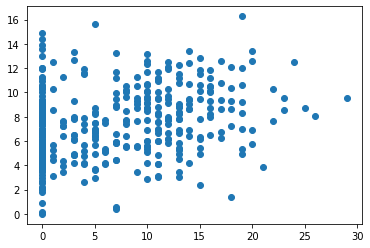

In [38]:
plt.scatter(feature, target, data=data)
# sns.scatterplot(x=feature, y=target, data=data)
plt.show()

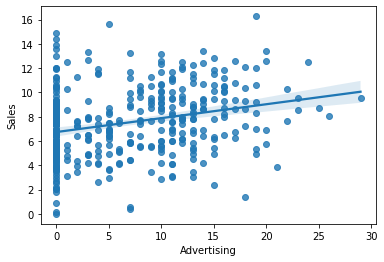

In [49]:
sns.regplot(x=feature, y=target, data=data) # 회귀선 추가
plt.show()

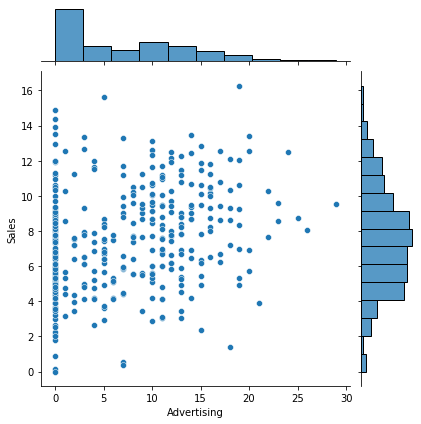

In [7]:
sns.jointplot(x=feature, y=target, data = data)
plt.show()

2) 수치화 : 상관분석

In [8]:
spst.pearsonr(data[feature], data[target])

PearsonRResult(statistic=0.2695067813769019, pvalue=4.377677110302732e-08)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- p-value가 0.05 이하로 작으나, 상관계수 r이 0.27이므로 광고 비용과 판매량 사이에는 양적 상관관계가 존재하긴 하나 강하진 않음을 관찰할 수 있다. 

#### ② Population -> Sales

1) 시각화 : scatter(regplot), jointplot

In [39]:
feature = 'Population'

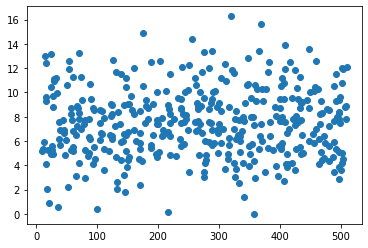

In [40]:
plt.scatter(feature, target, data=data)
plt.show()

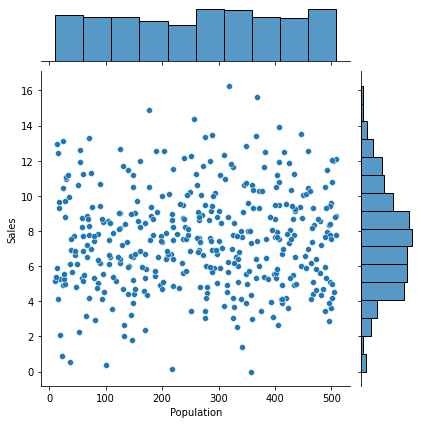

In [11]:
sns.jointplot(x=feature, y=target, data = data)
plt.show()

2) 수치화 : 상관분석

In [12]:
spst.pearsonr(data[feature], data[target])

PearsonRResult(statistic=0.05047098447203919, pvalue=0.31398160931903)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 상관계수 r이 0.05로 0에 가까우며, p-value가 0.3인 것으로 보아 인구수와 판매량 사이에 관련성이 관찰되지 않음을 알 수 있다.

#### ③ Price -> Sales

1) 시각화 : scatter(regplot), jointplot

In [51]:
feature = 'Price'

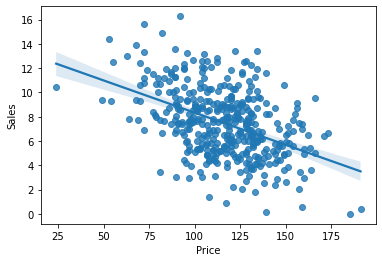

In [52]:
sns.regplot(x=feature, y=target, data=data)
plt.show()

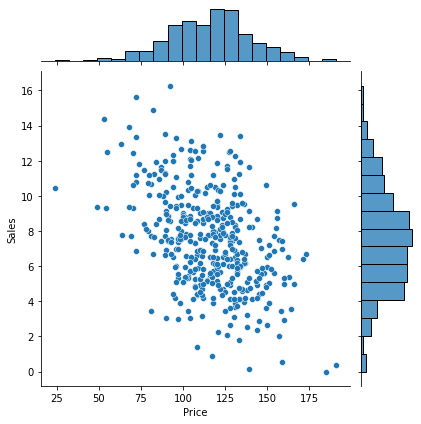

In [15]:
sns.jointplot(x=feature, y=target, data = data)
plt.show()

2) 수치화 : 상관분석

In [16]:
spst.pearsonr(data[feature], data[target])

PearsonRResult(statistic=-0.44495072784657264, pvalue=7.618187011912723e-21)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 상관계수 r이 -0.44, p-value가 0에 가까우므로 가격과 판매량은 음적 상관관계를 가짐을 알 수 있다.

#### ④ Age -> Sales

1) 시각화 : scatter(regplot), jointplot

In [43]:
feature = 'Age'

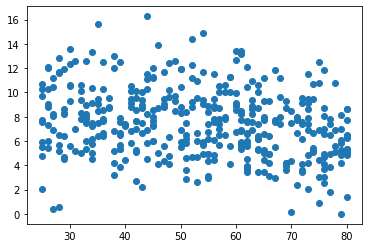

In [44]:
plt.scatter(feature, target, data=data)
plt.show()

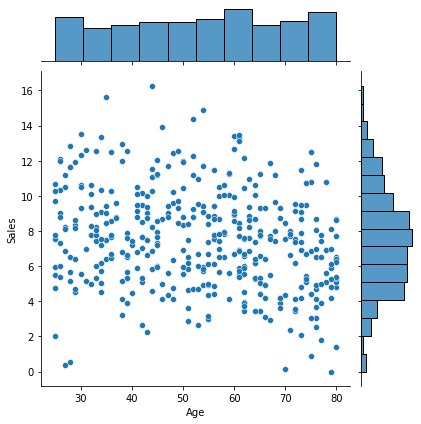

In [19]:
sns.jointplot(x=feature, y=target, data = data)
plt.show()

2) 수치화 : 상관분석

In [20]:
spst.pearsonr(data[feature], data[target])

PearsonRResult(statistic=-0.2318154396045765, pvalue=2.7889498393711916e-06)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- p-value는 0.05이하의 값을 가지나, 상관계수 r이 -0.23인 것으로 미루어보아 지역 내 연령대(평균 연령)와 판매량은 약한 음의 상관관계를 가진다고 추론할 수 있다. 

#### ⑤ CompPrice -> Sales

1) 시각화 : scatter(regplot), jointplot

In [45]:
feature = 'CompPrice'

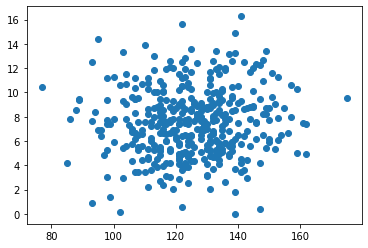

In [46]:
plt.scatter(feature, target, data=data)
plt.show()

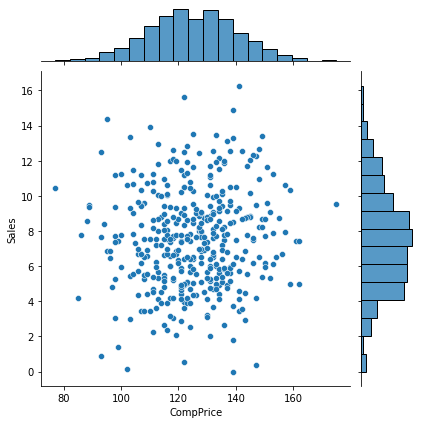

In [23]:
sns.jointplot(x=feature, y=target, data = data)
plt.show()

2) 수치화 : 상관분석

In [24]:
spst.pearsonr(data[feature], data[target])

PearsonRResult(statistic=0.06407872955062156, pvalue=0.2009398289418295)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 상관계수 r이 0.06, p-value가 0.2인 것으로 보았을 때 경쟁사의 가격과 판매량은 관련성이 낮다고 추론할 수 있다.

### (2) 범주형 X --> Y

* 모든 범자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

#### ① ShelveLoc-> Sales

In [25]:
feature = 'ShelveLoc'

In [26]:
data[feature].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

1) 시각화 : 평균비교 barplot

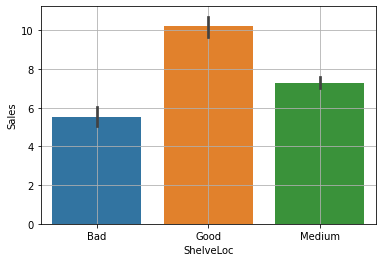

In [27]:
sns.barplot(x=feature, y=target, data=data)
plt.grid()
plt.show()

2) 수치화 : t-test, anova

In [29]:
sl_1 = data.loc[data[feature] == 'Bad', target]
sl_2 = data.loc[data[feature] == 'Medium', target]
sl_3 = data.loc[data[feature] == 'Good', target]

spst.f_oneway(sl_1, sl_2, sl_3)

F_onewayResult(statistic=92.22990509910348, pvalue=1.26693609015938e-33)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- f 통계량의 값이 매우 크고 p-value가 0에 가까우므로 진열상태와 판매량 사이에 강한 상관관계가 있음을 알 수 있다.

#### ② US-> Sales

In [30]:
feature = 'US'

In [31]:
data[feature].unique()

array(['Yes', 'No'], dtype=object)

1) 시각화 : 평균비교 barplot

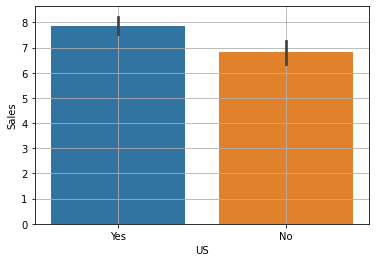

In [32]:
sns.barplot(x=feature, y=target, data=data)
plt.grid()
plt.show()

2) 수치화 : t-test, anova

In [33]:
us_1 = data.loc[data[feature] == 'Yes', target]
us_2 = data.loc[data[feature] == 'No', target]

spst.f_oneway(us_1, us_2)

F_onewayResult(statistic=12.886224277474618, pvalue=0.0003723395870148404)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- f 통계량의 값이 3 이상으로 크고, p-value가 0에 가까우므로 매장이 미국에 있는지 여부와 판매량 사이에 강한 상관관계가 있음을 알 수 있다.

### (3) 관계 정리하기

- 관계의 강함 정도를 틀리고 맞고 상관 X 데이터를 통해 비즈니스를 이해하는 것이 중요함

① 강한관계

- ShelveLoc

② 중간관계

- Advertising, Price, Age, US

③ 관계없음

- Population, CompPrice

### (4) 의문점 정리하기
- 데이터 분석가 / 기업 관점이 아니라 고객 관점에서 데이터 보기

- 광고 비용(Advertising): 0에 밀집되어 있는 데이터가 많음(미국 외 점포): 미국 내 데이터만 추가 분석하면 좋을 듯
- 상관분석으로 보았을 때 관련성이 낮으나 의문스러운 내용 추가
    - 연령대(Age), 인구 수(Population): 구매 연령대 및 인구 수가 많은 지역을 알 수 없음 -> 인구의 분포를 볼 수 있는 자료 필요
    - 경쟁사 가격(CompPrice): 경쟁사의 가격이 아니라 경쟁사 제품과 당사 제품의 가격 차이가 판매량과 상관관계가 있을 것으로 예상 -> 가격 경쟁력 항목 추가 (Feature Engineering)
        - 가격경쟁력(CompPrice - Price) -> Sales 상관 분석 결과 r: 0.56,  p-value: 3.87e-40

# 2.범주형 Y

## 1.1 타이타닉 탑승객 데이터 : 기본

![](https://images0.persgroep.net/rcs/0XaEsm6zKVcBbpINLInGGmU2F8w/diocontent/22495473/_crop/2/111/1997/1128/_fitwidth/763?appId=93a17a8fd81db0de025c8abd1cca1279&quality=0.8)

|	변수	|	설명	|	값 설명	|
|	----	|	----	|	----	|
|	survived	|	생존여부	|	0 - 사망, 1- 생존	|
|	Pclass	|	Ticket class	|	1 = 1st, 2 = 2nd, 3 = 3rd	|
|	Sex	|	성별	|		|
|	Age	|	Age in years	|		|
|	Sibsp	|	# of siblings / spouses aboard the Titanic	|		|
|	Parch	|	# of parents / children aboard the Titanic	|		|
|	Ticket	|	Ticket number	|		|
|	Fare	|	Passenger fare	|		|
|	Cabin	|	Cabin number	|		|
|	Embarked	|	Port of Embarkation	|	C = Cherbourg, Q = Queenstown, S = Southampton	|


In [ ]:
titanic = pd.read_csv('https://bit.ly/3FsgwkJ')
titanic.head()

In [ ]:
target = 'Survived'

### (1) 숫자형 X --> 범주형 Y

* 그래프 : histogram, densityplot
* 수치화 : 로지스틱회귀  
* 관계 평가

#### ① Age --> Survived

In [ ]:
feature = 'Age' 

1) 그래프 : histogram, densityplot

In [ ]:
sns.histplot(x=feature, data = titanic, hue =target)
plt.show()

In [ ]:
sns.kdeplot(x=feature, data = titanic, hue =target, common_norm = False)
plt.show()

2) 수치화 : 로지스틱회귀

In [ ]:
model = sm.Logit(titanic[feature], titanic[target])
result = model.fit()
print(result.pvalues)

3) 관계 평가하기

4) 추가 분석할 내용 정리

#### ② Fare --> Survived

In [ ]:
feature = 'Fare' 

1) 그래프 : histogram, densityplot

In [ ]:
sns.histplot(x=feature, data = titanic, hue =target)
plt.show()

In [ ]:
sns.kdeplot(x=feature, data = titanic, hue =target, common_norm = False)
plt.show()

2) 수치화 : 로지스틱회귀

In [ ]:
model = sm.Logit(titanic[feature], titanic[target])
result = model.fit()
print(result.pvalues)

3) 관계 평가하기

4) 추가 분석할 내용 정리

### (2) 범주형 X --> 범주형 Y

* 교차표(pd.crosstab())
* 시각화( Stacked Bar, Mosaic)
* 가설검정(카이제곱검정)
* 관계 평가

#### ① Sex --> Survived

In [ ]:
feature = 'Sex' 

1) 교차표(pd.crosstab())

In [ ]:
tb = pd.crosstab(data[feature], data[target])

2) 시각화( Stacked Bar, Mosaic)

In [ ]:
tb_2 = pd.crosstab(data[feature], data[target], normalize='index')
tb_2.plot.bar(stacked=True)
plt.axhline(1-data[target].mean(), color='r')
plt.show()

In [ ]:
mosaic(data, [feature, target])
plt.axhline(1-data[target].mean(), color='r')
plt.show()

3) 가설검정(카이제곱검정)

In [ ]:
rst = spst.chi2_contingency(tb)

print('카이제곱 검정: ', rst[0])
print('p-value: ', rst[1])
print('자유도: ', rst[2])

4) 관계 평가하기

5) 추가 분석하기

#### ② Pclass --> Survived

In [ ]:
feature = 'Pclass' 

1) 교차표(pd.crosstab())

In [ ]:
tb = pd.crosstab(data[feature], data[target])

2) 시각화( Stacked Bar, Mosaic)

In [ ]:
tb_2 = pd.crosstab(data[feature], data[target], normalize='index')
tb_2.plot.bar(stacked=True)
plt.axhline(1-data[target].mean(), color='r')
plt.show()

In [ ]:
mosaic(data, [feature, target])
plt.axhline(1-data[target].mean(), color='r')
plt.show()

3) 가설검정(카이제곱검정)

In [ ]:
rst = spst.chi2_contingency(tb)

print('카이제곱 검정: ', rst[0])
print('p-value: ', rst[1])
print('자유도: ', rst[2])

4) 관계 평가하기

5) 추가 분석하기

#### ③ Embarked --> Survived

In [ ]:
feature = 'Embarked' 

1) 교차표(pd.crosstab())

In [ ]:
tb = pd.crosstab(data[feature], data[target])

2) 시각화( Stacked Bar, Mosaic)

In [ ]:
tb_2 = pd.crosstab(data[feature], data[target], normalize='index')
tb_2.plot.bar(stacked=True)
plt.axhline(1-data[target].mean(), color='r')
plt.show()

In [ ]:
mosaic(data, [feature, target])
plt.axhline(1-data[target].mean(), color='r')
plt.show()

3) 가설검정(카이제곱검정)

In [ ]:
rst = spst.chi2_contingency(tb)

print('카이제곱 검정: ', rst[0])
print('p-value: ', rst[1])
print('자유도: ', rst[2])

4) 관계 평가하기

5) 추가 분석하기

### (3) 관계 정리하기

① 강한관계

② 중간관계

③ 관계없음